<a href="https://colab.research.google.com/github/alemezrin/Optimizacion-I/blob/main/Metodo_Golden_Brent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Metodo de la Seccion Dorada Resumen**
La búsqueda (o método) de la sección dorada es una técnica para hallar el extremo (mínimo o máximo) de una función unimodal, mediante reducciones sucesivas del rango de valores en el cual se encuentra el extremo.

$\tau = \frac{1+ \sqrt{5}}{2} $

$x_1= \tau a + (1- \tau b) $

# **Metodo de Brent Resumen**
Richard Brent vislumbró una rutina que combinaba la confiabilidad del método de bisección con la velocidad del método de la secante, y añadió otro método que puede ser más rápido. La idea es que se comienza con un cambio de signo en el intervalo, del cual no se sale. Entonces se tiene tres alternativas para realizar el siguiente paso:

*   El paso de bisección (lento);
*   El paso de la secante (mediano);
*   El paso "cuadrático inverso" (rápido);

Si la iteración resulta bastante bien, se toma el paso rápido. En el caso de que se esté en el paso de la secante o cuadrático inverso y no mejora, se toma el paso de bisección. Como se ve, este método bien complicado para codificar. Este tipo de programa aplica el concepto de adaptatividad, lo que significa que se "adapta y ajusta según la experiencia previa" del problema.

# **Funcion Unimodal 1**#
$f(x)=(x-x_0)^2 + e^{(-5(x - 0.5 - x_0)^2)}$, $\forall x \in [0.5,6]$




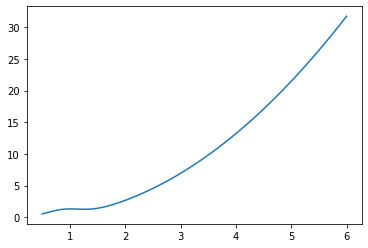

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
from tabulate import tabulate

def f(x):
    return ((x-x0)**2 + np.exp(-5*(x - 0.5 - x0)**2))

x = np.linspace(0.5, 6, 100)
x0 = np.exp(-1)

plt.plot(x, f(x))

## Metodo Golden

### Resultado

In [4]:
resultado1= optimize.minimize_scalar(f, (0.5,6), method='golden')
resultado1

     fun: 0.12229946413411437
    nfev: 51
     nit: 46
 success: True
       x: 0.12812913516268393

### Resultado por Iteracion

In [8]:
iter=39
res1= optimize.minimize_scalar(f, (0.5,6), method='golden', tol=10**(-6),options={"maxiter": iter})

res1


     fun: 0.12229946413411627
    nfev: 43
     nit: 38
 success: True
       x: 0.12812910194614183

### Tabla Iteracion vs Aproximacion

In [9]:
res1.success=False
iter=1
xRes1=[]
while res1.success == False:
  res1= optimize.minimize_scalar(f, (0.5,6), method='golden', tol=10**(-6),options={"maxiter": iter})
  xRes1.append(res1.x)
  iter+=1

In [26]:
aproxRes1={'Iter': list(range(1, len(xRes1)+1)) , 'aproxRes1': xRes1}
print(tabulate(aproxRes1, tablefmt='fancy_grid', headers=["Iteracion", "Aproximacion"]))

╒═════════════╤════════════════╕
│   Iteracion │   Aproximacion │
╞═════════════╪════════════════╡
│           1 │     0.5        │
├─────────────┼────────────────┤
│           2 │     0.5        │
├─────────────┼────────────────┤
│           3 │     0.5        │
├─────────────┼────────────────┤
│           4 │     0.00406531 │
├─────────────┼────────────────┤
│           5 │     0.00406531 │
├─────────────┼────────────────┤
│           6 │     0.193496   │
├─────────────┼────────────────┤
│           7 │     0.193496   │
├─────────────┼────────────────┤
│           8 │     0.12114    │
├─────────────┼────────────────┤
│           9 │     0.12114    │
├─────────────┼────────────────┤
│          10 │     0.12114    │
├─────────────┼────────────────┤
│          11 │     0.12114    │
├─────────────┼────────────────┤
│          12 │     0.131696   │
├─────────────┼────────────────┤
│          13 │     0.131696   │
├─────────────┼────────────────┤
│          14 │     0.127664   │
├─────────

### Grafica Iteracion vs Aproximacion

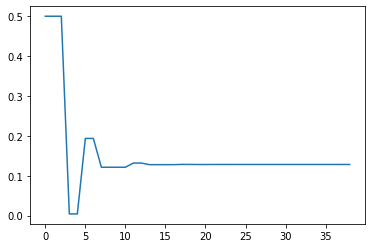

In [11]:
plt.plot(xRes1)

### Tabla Iteracion vs Error

In [27]:
eRes1=abs(np.array(xRes1)-xRes1[-1])/abs(xRes1[-1])
errorRes1={'Iter': list(range(1, len(xRes1)+1)) , 'errorRes1': eRes1}
print(tabulate(errorRes1, tablefmt='fancy_grid', headers=["Iteracion","Error"]))

╒═════════════╤═════════════╕
│   Iteracion │       Error │
╞═════════════╪═════════════╡
│           1 │ 2.90231     │
├─────────────┼─────────────┤
│           2 │ 2.90231     │
├─────────────┼─────────────┤
│           3 │ 2.90231     │
├─────────────┼─────────────┤
│           4 │ 0.968272    │
├─────────────┼─────────────┤
│           5 │ 0.968272    │
├─────────────┼─────────────┤
│           6 │ 0.51016     │
├─────────────┼─────────────┤
│           7 │ 0.51016     │
├─────────────┼─────────────┤
│           8 │ 0.0545504   │
├─────────────┼─────────────┤
│           9 │ 0.0545504   │
├─────────────┼─────────────┤
│          10 │ 0.0545504   │
├─────────────┼─────────────┤
│          11 │ 0.0545504   │
├─────────────┼─────────────┤
│          12 │ 0.0278398   │
├─────────────┼─────────────┤
│          13 │ 0.0278398   │
├─────────────┼─────────────┤
│          14 │ 0.00363044  │
├─────────────┼─────────────┤
│          15 │ 0.00363044  │
├─────────────┼─────────────┤
│         

### Grafica Iteracion vs Error

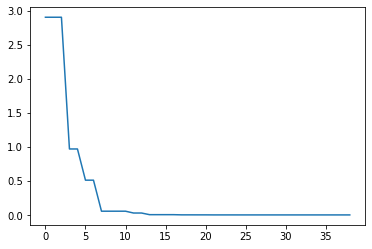

In [29]:
plt.plot(eRes1)

### Grafica de Tasa de Convergencia

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


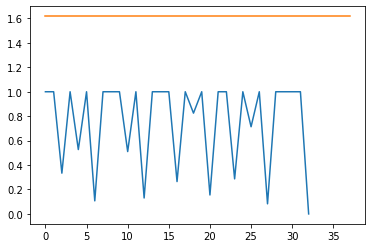

In [30]:
yRes1=abs(np.array(xRes1)-xRes1[-1])
tRes1=[]
for i in range(len(yRes1)-1):
  t=yRes1[i+1]/yRes1[i]
  tRes1.append(t)

pRes1=(1+np.sqrt(5))/2

plt.plot(tRes1)
plt.plot(pRes1*np.ones(len(tRes1)))

## Metodo de Brent

### Resultado

In [31]:
resultado2= optimize.minimize_scalar(f, (0.5,6), method='brent')
resultado2

     fun: 0.12229946413411436
    nfev: 18
     nit: 14
 success: True
       x: 0.12812913205795382

### Resultado por Iteracion

In [32]:
iter=14
res2= optimize.minimize_scalar(f, (0.5,6), method='brent', tol=10**(-6),options={"maxiter": iter})

res2

     fun: 0.12229946413411447
    nfev: 17
     nit: 13
 success: True
       x: 0.1281291366092816

### Tabla Iteracion vs Aproximacion

In [69]:
res2.success=False
iter=1
xRes2=[]
while res2.success == False:
  res2= optimize.minimize_scalar(f, (0.5,6), method='brent', tol=10**(-6),options={"maxiter": iter})
  xRes2.append(res2.x)
  iter+=1

aproxRes2={'Iter': list(range(1, len(xRes2)+1)) , 'aproxRes2': xRes2}
print(tabulate(aproxRes2, tablefmt='fancy_grid', headers=["Iteracion", "Aproximacion"]))

╒═════════════╤════════════════╕
│   Iteracion │   Aproximacion │
╞═════════════╪════════════════╡
│           1 │     0.5        │
├─────────────┼────────────────┤
│           2 │     0.5        │
├─────────────┼────────────────┤
│           3 │     0.407505   │
├─────────────┼────────────────┤
│           4 │     0.407505   │
├─────────────┼────────────────┤
│           5 │    -0.00621123 │
├─────────────┼────────────────┤
│           6 │     0.123148   │
├─────────────┼────────────────┤
│           7 │     0.123148   │
├─────────────┼────────────────┤
│           8 │     0.129174   │
├─────────────┼────────────────┤
│           9 │     0.128147   │
├─────────────┼────────────────┤
│          10 │     0.128127   │
├─────────────┼────────────────┤
│          11 │     0.128129   │
├─────────────┼────────────────┤
│          12 │     0.128129   │
├─────────────┼────────────────┤
│          13 │     0.128129   │
├─────────────┼────────────────┤
│          14 │     0.128129   │
╘═════════

### Grafica Iteracion vs Aproximacion

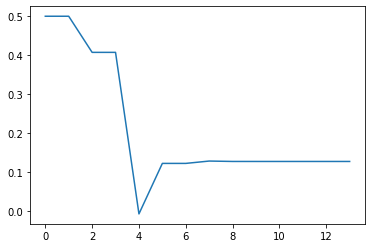

In [35]:
plt.plot(xRes2)

### Tabla Iteracion vs Error

In [38]:
eRes2=abs(np.array(xRes2)-xRes2[-1])/abs(xRes2[-1])
errorRes2={'Iter': list(range(1, len(xRes2)+1)) , 'errorRes2': eRes2}
print(tabulate(errorRes2, tablefmt='fancy_grid', headers=["Iteracion","Error"]))

╒═════════════╤═════════════╕
│   Iteracion │       Error │
╞═════════════╪═════════════╡
│           1 │ 2.90231     │
├─────────────┼─────────────┤
│           2 │ 2.90231     │
├─────────────┼─────────────┤
│           3 │ 2.18042     │
├─────────────┼─────────────┤
│           4 │ 2.18042     │
├─────────────┼─────────────┤
│           5 │ 1.04848     │
├─────────────┼─────────────┤
│           6 │ 0.0388762   │
├─────────────┼─────────────┤
│           7 │ 0.0388762   │
├─────────────┼─────────────┤
│           8 │ 0.0081544   │
├─────────────┼─────────────┤
│           9 │ 0.000136321 │
├─────────────┼─────────────┤
│          10 │ 1.66997e-05 │
├─────────────┼─────────────┤
│          11 │ 0           │
├─────────────┼─────────────┤
│          12 │ 0           │
├─────────────┼─────────────┤
│          13 │ 0           │
├─────────────┼─────────────┤
│          14 │ 0           │
╘═════════════╧═════════════╛


### Grafica Iteracion vs Error

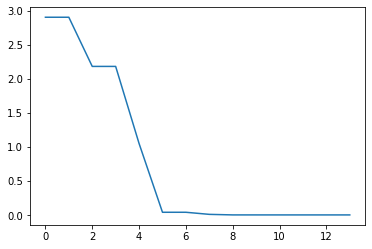

In [39]:
plt.plot(eRes2)

### Grafica de Tasa de Convergencia

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


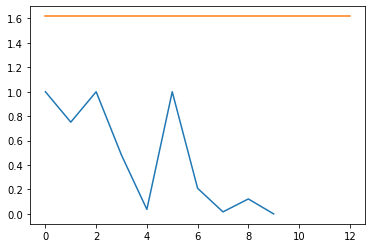

In [40]:
yRes2=abs(np.array(xRes2)-xRes2[-1])
tRes2=[]
for i in range(len(yRes2)-1):
  t=yRes2[i+1]/yRes2[i]
  tRes2.append(t)

pRes2=(1+np.sqrt(5))/2

plt.plot(tRes2)
plt.plot(pRes2*np.ones(len(tRes2)))

# Funcion Unimodal 2 #

$g(x)=0.5 - xe^{-x^2}$, $\forall x \in [0,2]$


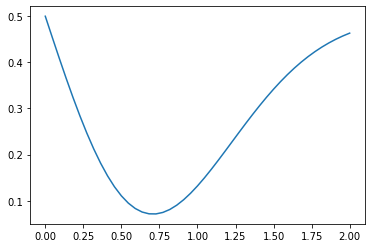

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
from tabulate import tabulate


def g(x):
    return (0.5-(x*np.exp(-(x*x))))

x = np.linspace(0, 2, 45)

plt.plot(x, g(x))


## Metodo Golden

### Resultado

In [45]:
solucion1= optimize.minimize_scalar(g, (0,2), method='golden')
solucion1

     fun: 0.07111805751964662
    nfev: 46
     nit: 41
 success: True
       x: 0.7071067793458041

### Resultado por Iteracion

In [47]:
iter=33
sol1= optimize.minimize_scalar(g, (0,2), method='golden', tol=10**(-6),options={"maxiter": iter})

sol1

     fun: 0.07111805751965111
    nfev: 37
     nit: 32
 success: True
       x: 0.7071068533944787

### Tabla Iteracion vs Aproximacion

In [61]:
sol1.success=False
iter=1
xSol1=[]
while sol1.success == False:
  sol1= optimize.minimize_scalar(g, (0,2), method='golden', tol=10**(-6),options={"maxiter": iter})
  xSol1.append(sol1.x)
  iter+=1

aproxSol1={'Iter': list(range(1, len(xSol1)+1)) , 'aproxRes1': xSol1}
print(tabulate(aproxSol1, tablefmt='fancy_grid', headers=["Iteracion", "Aproximacion"]))


╒═════════════╤════════════════╕
│   Iteracion │   Aproximacion │
╞═════════════╪════════════════╡
│           1 │       1.23607  │
├─────────────┼────────────────┤
│           2 │       0.763932 │
├─────────────┼────────────────┤
│           3 │       0.763932 │
├─────────────┼────────────────┤
│           4 │       0.763932 │
├─────────────┼────────────────┤
│           5 │       0.652476 │
├─────────────┼────────────────┤
│           6 │       0.652476 │
├─────────────┼────────────────┤
│           7 │       0.695048 │
├─────────────┼────────────────┤
│           8 │       0.695048 │
├─────────────┼────────────────┤
│           9 │       0.695048 │
├─────────────┼────────────────┤
│          10 │       0.705098 │
├─────────────┼────────────────┤
│          11 │       0.705098 │
├─────────────┼────────────────┤
│          12 │       0.705098 │
├─────────────┼────────────────┤
│          13 │       0.707471 │
├─────────────┼────────────────┤
│          14 │       0.707471 │
├─────────

### Grafica Iteracion vs Aproximacion

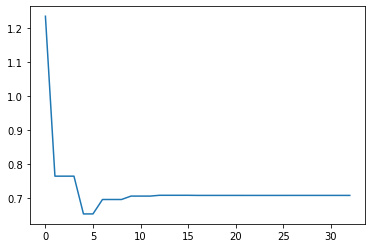

In [62]:
plt.plot(xSol1)

### Tabla Iteracion vs Error

In [50]:
eSol1=abs(np.array(xSol1)-xSol1[-1])/abs(xSol1[-1])
errorSol1={'Iter': list(range(1, len(xSol1)+1)) , 'errorSol1': eSol1}
print(tabulate(errorSol1, tablefmt='fancy_grid', headers=["Iteracion","Error"]))

╒═════════════╤═════════════╕
│   Iteracion │       Error │
╞═════════════╪═════════════╡
│           1 │ 0.748064    │
├─────────────┼─────────────┤
│           2 │ 0.0803629   │
├─────────────┼─────────────┤
│           3 │ 0.0803629   │
├─────────────┼─────────────┤
│           4 │ 0.0803629   │
├─────────────┼─────────────┤
│           5 │ 0.0772599   │
├─────────────┼─────────────┤
│           6 │ 0.0772599   │
├─────────────┼─────────────┤
│           7 │ 0.0170533   │
├─────────────┼─────────────┤
│           8 │ 0.0170533   │
├─────────────┼─────────────┤
│           9 │ 0.0170533   │
├─────────────┼─────────────┤
│          10 │ 0.0028405   │
├─────────────┼─────────────┤
│          11 │ 0.0028405   │
├─────────────┼─────────────┤
│          12 │ 0.0028405   │
├─────────────┼─────────────┤
│          13 │ 0.000514695 │
├─────────────┼─────────────┤
│          14 │ 0.000514695 │
├─────────────┼─────────────┤
│          15 │ 0.000514695 │
├─────────────┼─────────────┤
│         

### Grafica Iteracion vs Error

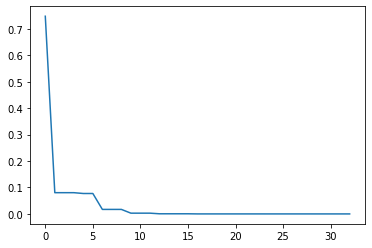

In [52]:
plt.plot(eSol1)

### Grafica de Tasa de Convergencia

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


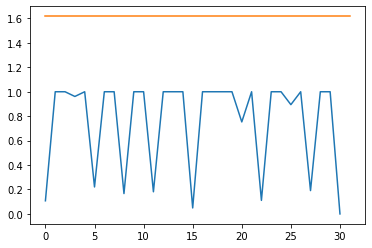

In [53]:
ySol1=abs(np.array(xSol1)-xSol1[-1])
tSol1=[]
for i in range(len(ySol1)-1):
  t=ySol1[i+1]/ySol1[i]
  tSol1.append(t)

pSol1=(1+np.sqrt(5))/2

plt.plot(tSol1)
plt.plot(pSol1*np.ones(len(tSol1)))

## Metodo de Brent

### Resultado

In [54]:
solucion2= optimize.minimize_scalar(g, (0,2), method='brent')
solucion2

     fun: 0.07111805751964662
    nfev: 16
     nit: 12
 success: True
       x: 0.7071067770435648

### Resultado por Iteracion

In [55]:
iter=12
sol2= optimize.minimize_scalar(g, (0,2), method='brent', tol=10**(-6), options={"maxiter": iter})
sol2

     fun: 0.07111805751965866
    nfev: 15
     nit: 11
 success: True
       x: 0.7071066625104957

### Tabla Iteracion vs Aproximacion

In [68]:
sol2.success=False
iter=1
xSol2=[]
while sol2.success == False:
  sol2= optimize.minimize_scalar(g, (0,2), method='brent', tol=10**(-6),options={"maxiter": iter})
  xSol2.append(sol2.x)
  iter+=1

aproxSol2={'Iter': list(range(1, len(xSol2)+1)) , 'aproxSol2': xSol2}
print(tabulate(aproxSol2, tablefmt='fancy_grid', headers=["Iteracion", "Aproximacion"]))

╒═════════════╤════════════════╕
│   Iteracion │   Aproximacion │
╞═════════════╪════════════════╡
│           1 │       2        │
├─────────────┼────────────────┤
│           2 │       1.23607  │
├─────────────┼────────────────┤
│           3 │       0.763932 │
├─────────────┼────────────────┤
│           4 │       0.763932 │
├─────────────┼────────────────┤
│           5 │       0.744624 │
├─────────────┼────────────────┤
│           6 │       0.710695 │
├─────────────┼────────────────┤
│           7 │       0.706436 │
├─────────────┼────────────────┤
│           8 │       0.70708  │
├─────────────┼────────────────┤
│           9 │       0.707107 │
├─────────────┼────────────────┤
│          10 │       0.707107 │
├─────────────┼────────────────┤
│          11 │       0.707107 │
├─────────────┼────────────────┤
│          12 │       0.707107 │
╘═════════════╧════════════════╛


### Grafica Iteracion vs Aproximacion

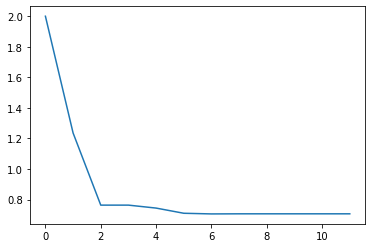

In [64]:
plt.plot(xSol2)

### Tabla Iteracion vs Error

In [60]:
eSol2=abs(np.array(xSol2)-xSol2[-1])/abs(xSol2[-1])
errorSol2={'Iter': list(range(1, len(xSol2)+1)) , 'errorSol2': eSol2}
print(tabulate(errorSol2, tablefmt='fancy_grid', headers=["Iteracion","Error"]))

╒═════════════╤═════════════╕
│   Iteracion │       Error │
╞═════════════╪═════════════╡
│           1 │ 1.82843     │
├─────────────┼─────────────┤
│           2 │ 0.748064    │
├─────────────┼─────────────┤
│           3 │ 0.0803632   │
├─────────────┼─────────────┤
│           4 │ 0.0803632   │
├─────────────┼─────────────┤
│           5 │ 0.0530581   │
├─────────────┼─────────────┤
│           6 │ 0.00507454  │
├─────────────┼─────────────┤
│           7 │ 0.000948592 │
├─────────────┼─────────────┤
│           8 │ 3.77812e-05 │
├─────────────┼─────────────┤
│           9 │ 1.00002e-06 │
├─────────────┼─────────────┤
│          10 │ 0           │
├─────────────┼─────────────┤
│          11 │ 0           │
├─────────────┼─────────────┤
│          12 │ 0           │
╘═════════════╧═════════════╛


### Grafica Iteracion vs Error

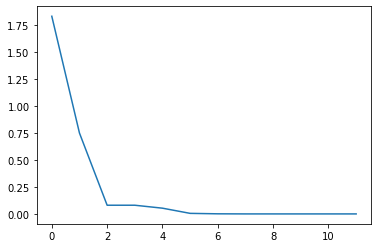

In [65]:
plt.plot(eSol2)

### Grafica de Tasa de Convergencia

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


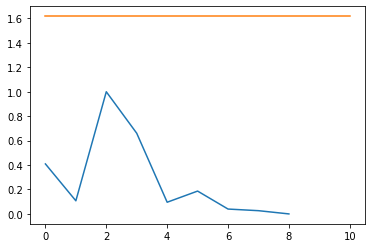

In [66]:
ySol2=abs(np.array(xSol2)-xSol2[-1])
tSol2=[]
for i in range(len(ySol2)-1):
  t=ySol2[i+1]/ySol2[i]
  tSol2.append(t)

pSol2=(1+np.sqrt(5))/2

plt.plot(tSol2)
plt.plot(pSol2*np.ones(len(tSol2)))

# Conclusiones

*   El metodo Golden al usarlo sin iteraciones converge mas lento.
*   El metodo Golden al usarlo con iteraciones converge mas rapido que al usarlo sin ellas.
*   El metodo de Brent al usuarlo sin iteraciones converge casi igual de rapido que al usarlo con iteraciones.
*   El metodo de Brent converge mas rapido que el metodo Golden.
* El error relativo del metodo Golden es mas pequeño que el del metodo de Brent.





# Referencias
Heath, M. T. (2018). Scientific Computing: An Introductory Survey, Revised Second Edition. Society for Industrial and Applied Mathematics.

Simone, P. (2009). Metodos numericos 2009, Universidad Nacional de Cuyo.